In [1]:
import librosa, librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 
%matplotlib inline

# 「MIR-01」要把音乐画出来，总共分几步？

> 伦敦最近热得像蒸笼，还没有空调，于是我就想到了冰箱，顺势想到了小品里的大象，想到了大象无形，想到了大音希声。诶等一下，“大音”因为听不到而无法理解，如果能画出来的话，是不是就有可能被get到了呢？

**♬ 本文为MIR系列，即音乐信息检索(Music Information Retrieval)的第一篇文章 ♬**

文章将以描画音乐为中心，解答以下问题：
- 从乐谱中可窥见MIR有哪些基础任务？
- MIDI到底是什么格式？又如何能被用作基础任务的“标准答案”？
- 各种由音频变换成的时频谱到底击中了你心中的哪一谱？

---

### 『音乐的表征/Representation』

大多数人觉得感受音乐，用耳朵好好去听就可以欣赏了，但对于音乐爱好者来说，必须要用某种形式把自己喜爱的音乐记录、保存、甚至复现或再度创作，心里才舒坦。因此，器乐演奏家手头上少不了五线谱，电音发烧友经常与MIDI打交道，而我与众多数据科学同行们的服务器上更是存着不知道多少WAV或MP3之类的文件。可见音乐被“具现化”后有多种表征形式，以上三个例子分别对应MIR领域内以下三种表征：乐谱（sheet music representation），符号化格式（symbolic representation），与音频文件（audio representation）。

我们就用下面这个简单的音乐片段为例，看看它在不同的表征形式上是如何被描画的！

In [2]:
audio_data, sr = librosa.load('attachment/mir01-music-example.wav', sr=None)
ipd.Audio(audio_data, rate=sr)

### 『乐谱』

这里的乐谱主要指西方的五线谱，上方的音乐片段就是在演奏下方的谱子：

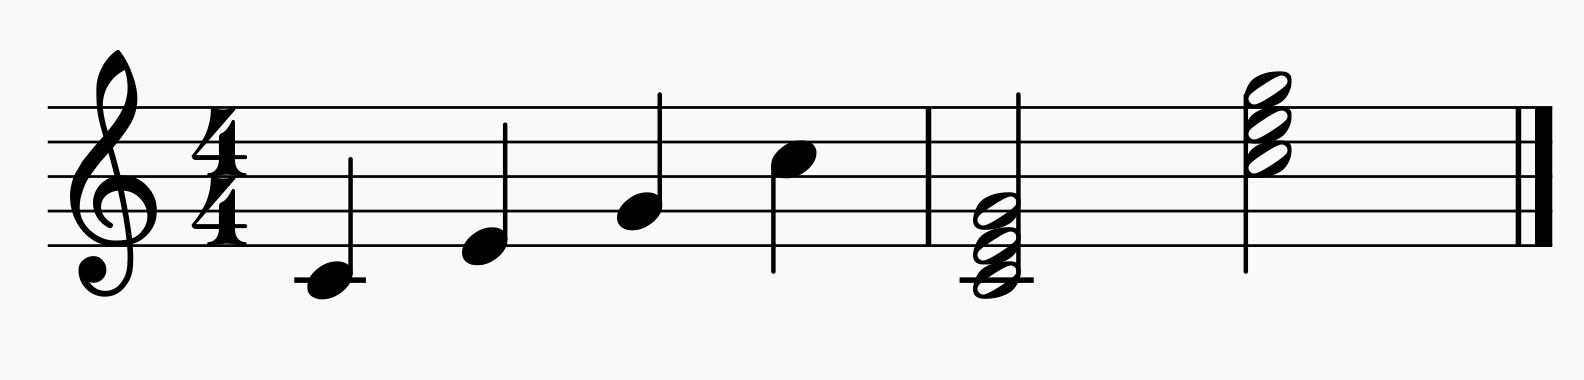

In [3]:
ipd.Image("attachment/mir01-music-score.png")

从五线谱中可知，我们以“四分音符为一拍，每小节有四拍”的基本节奏型，在第一小节的四拍上分别演奏了`C4` `E4` `G4` `C5`，在第二小节的前两拍和后两拍分别演奏了在不同音区的C和弦`Cmaj`，当前的调性是C大调。

乐理基础好的人，听到音乐后都能分析出类似上面一段的内容并记录在五线谱上，这个过程也俗称“扒谱”（transcription）。对于计算机来说，这个过程就是实现MIR内的各类任务，比如：
- 检测新音符出现的时刻（onset detection）
- 估计新音符的音高（pitch/F0 estimation）
- 追踪一拍一拍的位置（beat tracking）
- 和弦的行进（chord progression）
- 音乐的调性（key detection）

以上及其他较主流的MIR任务，在每年的MIREX竞赛上都在试图刷出更高的准确率。当然无论是乐谱还是音乐本身，还蕴含着更多高层次信息，如流派和情绪等等。更神奇的地方在于，即使是同一个谱子，不同演奏家可以做出完全不一样的解读，这种情况下，相比于分析乐谱，分析现场的音频录音更有必要，这其中常涉及到音频特征的提取（audio feature extraction），博主会在之后的文章里详细介绍。

另外，让计算机理解乐谱内容进而辅助音乐学家的工作，也是一类称为音乐图像识别（optical music recognition）的研究。

☞ 对“如何自动翻译富含传统民乐智慧的工尺谱”感兴趣的读者，推荐参考北邮李荣峰老师的研究项目。

---

### 『符号化格式』

与其将symbolic representation翻译成符号化格式，不如比喻成“机械眼中的乐谱”。这种格式最早可以追溯到19世纪末的欧洲，也就是自动演奏钢琴（player piano）被发明的时候，这种钢琴用“木手指”代替演奏者的双手，通过缓缓转动纸卷并读取上面被打孔的位置，可驱动“木手指”击琴键奏出音乐。这种纸卷即piano roll就是最原始的符号化格式，许多钢琴家也曾用它记录自己如何弹得一手好琴。

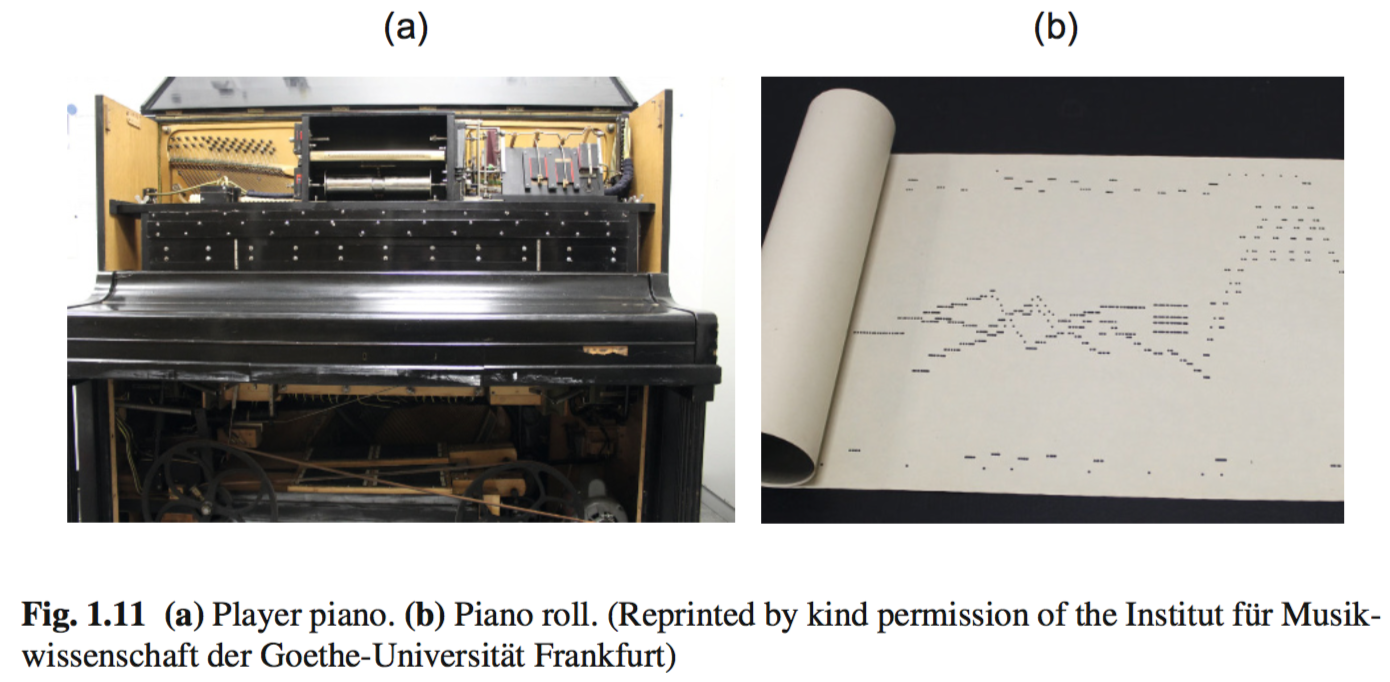

In [4]:
ipd.Image("attachment/mir01-pianoroll.png")

➥ 上图来源于Meinard Müller的《Fundamentals of Music Processing》书中第11页。

☞ 对“如何电子化piano roll”感兴趣的读者，推荐参考斯坦福博士生Zhengshan Shi的相关项目。

➥ https://ccrma.stanford.edu/~kittyshi/pianoroll/pianoroll.html

在现代随着计算机的普及，这种格式就演变成了“计算机眼中的乐谱”，因此包含了MusicXML和MIDI等等。

单单是五线谱上的一个中央C，在MusicXML文件中就等同于下面这么多行代码：

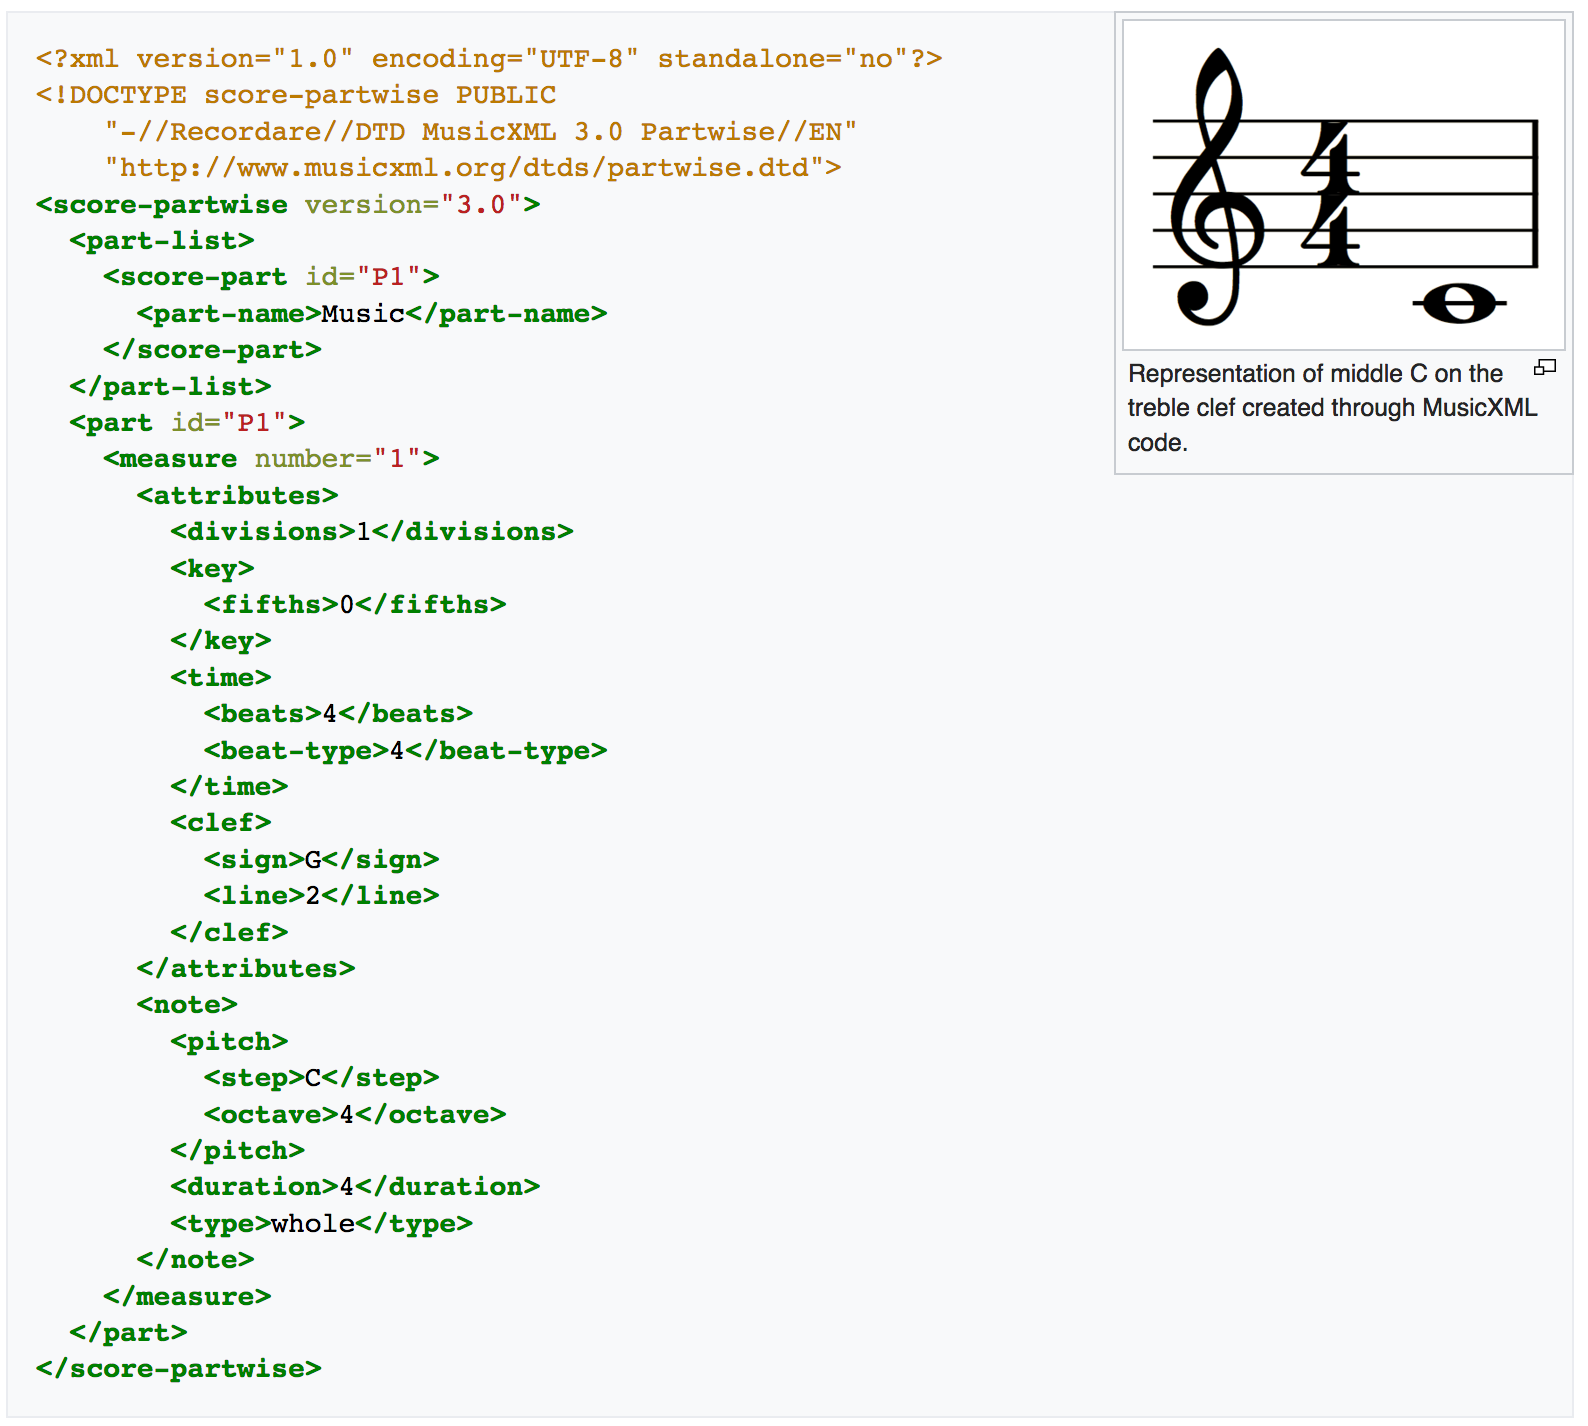

In [5]:
ipd.Image("attachment/mir01-musicxml.png")

➥ 上图来源https://en.wikipedia.org/wiki/MusicXML

☞ 如需要对MusicXML文件进行分析，推荐使用`music21`这个第三方python库做助攻。

在所有符号化格式中，MIDI可以说自80年代来就开始占据了C位。通过以下代码，我们来仔细看看文章最开头的音乐片段在MIDI格式中长什么样子!

✎ 如果你已经按之前文章配置好编程环境，进入文件夹后先用`git`更新内容，再激活`py37`虚拟环境，之后我们需要另外安装一个`pretty_midi`库（安装此库也能顺便安装上`mido`），再打开`jupyter notebook`运行本文`.ipynb`文件（确保当前kernel为Python[conda env:py37]）：
```
$ cd intro2musictech
$ git pull
$ source activate py37
(py37)$ pip install pretty_midi
(py37)$ jupyter notebook
```

下方代码可以将示例音乐片段对应的MIDI文件“打印”出来，可见MIDI格式的本质是遵循着一个标准技术规格（MIDI 1.0）将所有音乐中涉及的元素编码成数字数据的结构。该标准也声明了硬件和软件之间传输MIDI的协议，方便MIDI在各种合成器（synthesizer）和数字音乐工作站（DAW）之间被广泛使用。

In [6]:
import mido
midi_data = mido.MidiFile(filename='attachment/mir01-midi.mid')
for i, track in enumerate(midi_data.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
        print(msg)

Track 0: 
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='C' time=0>
<meta message set_tempo tempo=500000 time=0>
control_change channel=0 control=121 value=0 time=0
program_change channel=0 program=24 time=0
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=64 time=0
control_change channel=0 control=91 value=0 time=0
control_change channel=0 control=93 value=0 time=0
<meta message midi_port port=0 time=0>
note_on channel=0 note=60 velocity=80 time=0
note_on channel=0 note=60 velocity=0 time=479
note_on channel=0 note=64 velocity=80 time=1
note_on channel=0 note=64 velocity=0 time=479
note_on channel=0 note=67 velocity=80 time=1
note_on channel=0 note=67 velocity=0 time=479
note_on channel=0 note=72 velocity=80 time=1
note_on channel=0 note=72 velocity=0 time=479
note_on channel=0 note=60 velocity=80 time=1
note_on channel=0 note=64 velocity=80 t

我们也可以用把上面的结果画成piano roll的样子，这也是MIDI在各种DAW中所呈现的模样。

Text(0.5,1,'piano roll plot of a midi file')

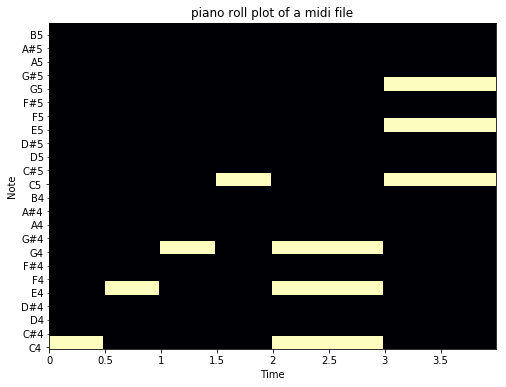

In [7]:
import pretty_midi
import librosa, librosa.display
import matplotlib.pyplot as plt 

def plot_piano_roll(midi_data, start_pitch, end_pitch, fs=100):
    librosa.display.specshow(midi_data.get_piano_roll(fs)[start_pitch:end_pitch],
                            hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                            fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8,6))
midi_data = pretty_midi.PrettyMIDI('attachment/mir01-midi.mid')
plot_piano_roll(midi_data,60,84)
plt.title('piano roll plot of a midi file')

可见，MIDI能准确记录某个音在什么时刻以何种力度被弹下，有些MIDI文件还含有节奏信息即能知道拍子和重音拍子（beat/downbeat）的位置，这些都表明MIDI可以在MIR任务中担任标准答案（ground truth）的角色，这也比人工做标注更加准确。

需要注意的是，MIDI中的时间并不是按我们常见的分秒表示的，而是以`tick`为单位，而一分钟内有多少个`tick`还取决于当前MIDI文件内规定一拍上有多少tick以及一分钟有多少拍。

☞ 目前piano transcription任务中所用到的数据库，大多包括钢琴音频及其对应的MIDI文件，如MAPS Dataset。

### 『音频文件和它的时频谱们』

终于说到了市面上最常见的音乐表征格式——音频！音频文件最常见的两种格式是WAV和MP3，两者区别主要在于音频是否被压缩，MP3因为被压缩了所以音质没有WAV那么“真”但文件占得地方可小得多。

音频文件中的参数可以衡量它到底能多逼真地表征音乐。首先采样频率（sample rate）反映该音频的频率范围，根据奈奎斯特定律，44100Hz的采样率能表现的频率范围是0-22050Hz，而人耳本身的频率范围是20-20000Hz，所以这种采样率下的音频文件听上去完全没毛病。另外一个参数叫位深（bit）用来反映采得每个样的振幅可以被多精细的表示，16 bit就代表当前采样的振幅是0-65536（2^16）中的某个数值，但是我们在DAW里看到的经常是分贝的值（dB）且0为最大值，一个bit大约等于6dB，那么16 bit就涵盖了-96到0dB的动态范围。

我们用下行代码加载本文最开始的音频片段，发现它在计算机眼里就是个长260864的一维数组……

In [8]:
audio_data, sr = librosa.load('attachment/mir01-music-example.wav', sr=None)
print("音频样本数：{}".format(len(audio_data)))

音频样本数：260864


MIR的最终目标之一就是让计算机把这个一维数组活活翻译成乐谱或符号化格式。为了实现这个目标，MIR中有着许许多多的子任务，且大多数子任务下的第一步，就是将一维数组变换成时频谱的矩阵，也就能知道每个单位时刻内的频率响应，这个过程也和人耳的听觉机制相吻合。

那么如何才能知道这些时域上的样本在频域上的表现呢？Baron Jean Baptiste Joseph Fourier也就是傅里叶同志，早就给出了我们解决问题的答案：**任何连续周期信号可以由一组适当的正弦曲线组合而成**。这位能跟着拿破仑远征埃及的数学家外加物理学家，实在是太硬核了……我简单用音乐例子翻译下这句话就是一个仅含有C和弦的音频信号可以由CEG三个音的正弦曲线组合而成。若想知道每个成分具体占了多少比重，就需要做傅里叶变换得到频谱，看看振幅了！

对于计算机来说，面对的是自然界连续信号采样后的离散信号，所以做的是离散傅里叶变换（DFT）或者“加速版”即快速傅里叶变换（FFT），这两者只会返回一个频率响应的“综述”，如果想知道频率响应随时间的变化，就需要沿着时间轴做个“滑动版”DFT或FFT，也就是短时傅里叶变换（STFT）。下面的代码可以画出本文音乐片段在时域上的波形图和STFT后的频谱图（功率谱）。

Text(0.5,1,'STFT spectrogram')

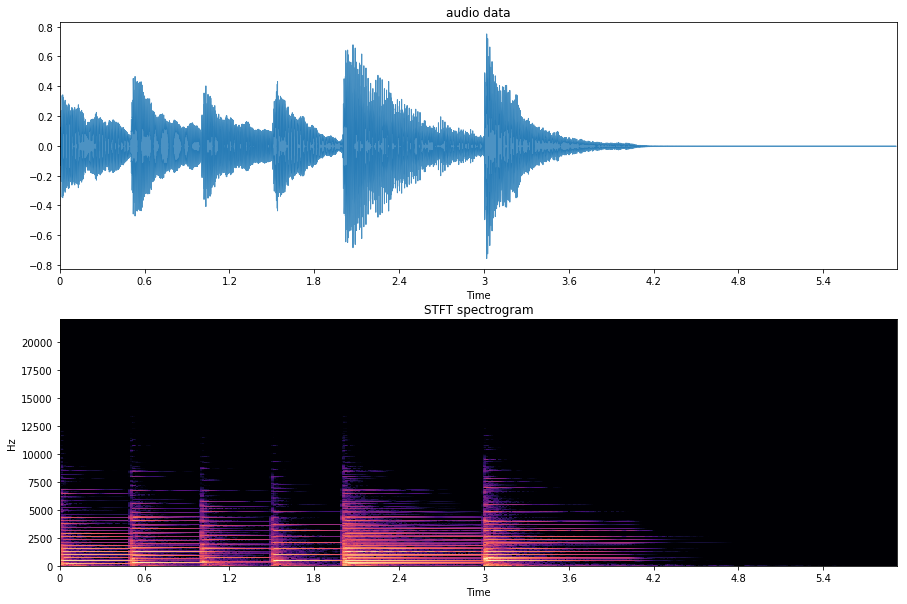

In [10]:
import numpy as np
# 加载音频
audio_data, sr = librosa.load('attachment/mir01-music-example.wav', sr=None)
# 对音频数据做STFT，使用窗长为n_fft即2048/44100=46ms
# 对该窗下的音频数据做FFT则返回1+n_fft/2个频点上的内容
# 将当前窗往下移动hop_length即512/44100=11.6ms再做FFT
# 重复操作以上内容实现滑动板FFT
D = librosa.stft(audio_data, n_fft=2048, hop_length=512)
# 得到的频谱包含振幅和相位两块信息
# 后续内容将更依赖振幅信息
magnitude, phase = librosa.magphase(D)

plt.figure(figsize=(15,10))
# 画出音频数据在时域上的波形图
ax1 = plt.subplot(2,1,1)
librosa.display.waveshow(audio_data, sr=sr, alpha=0.8)
plt.title('audio data')
# 画出STFT后的功率谱（以dB为单位）
ax2 = plt.subplot(2,1,2, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), sr=sr, y_axis='linear', x_axis='time')
plt.title('STFT spectrogram')

STFT频谱的纵轴上是频点（frequency bin）等间隔分布，频率分辨率为sr/n_fft。然而人类的听觉认知对频率并不是这样线性等间隔理解的，比如你听了1000Hz的声音之后，再去听2000Hz的声音，并不会觉得频率是二倍的关系，反而觉得频率只增加了一点儿，梅尔标度就是反应了人耳到底感受频率增加的一把尺，把这把尺的标度用在频谱上即为梅尔频谱。

在处理和音乐相关的频谱时，我们也许更希望频率轴对应的是各个音符的音高，因此常数Q变换（CQT）得到的频谱也十分常见。

我们用下面的代码对比看下同一段音乐的不同频谱图：

Text(0.5,1,'CQT spectrogram')

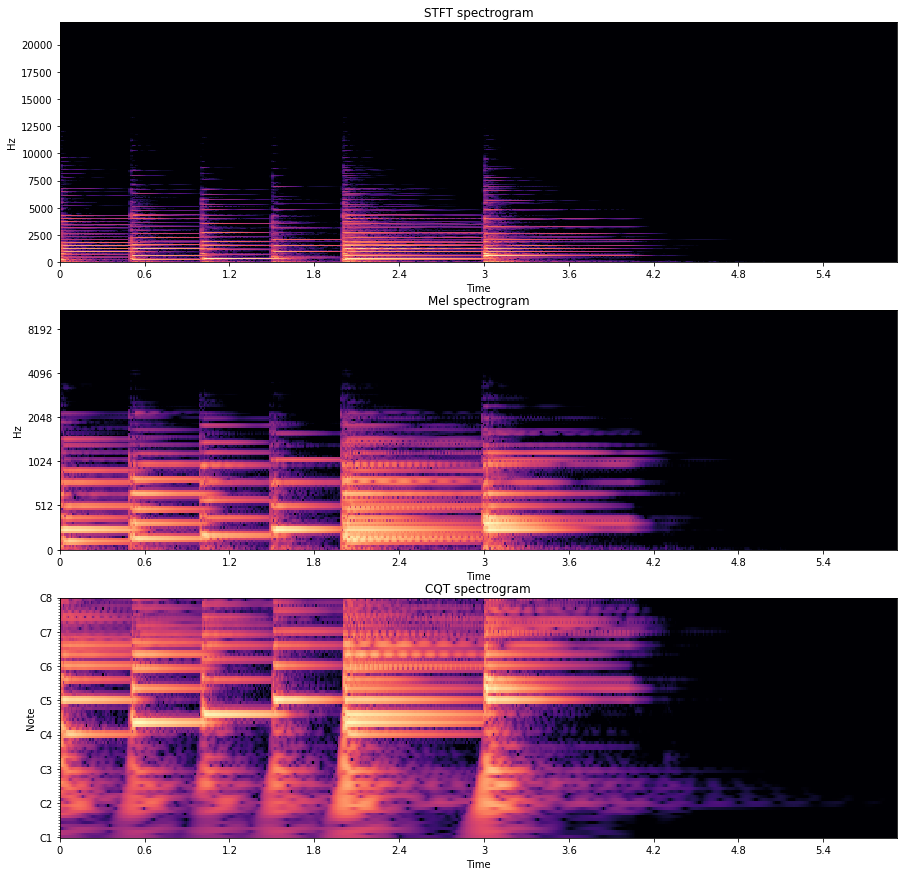

In [11]:
plt.figure(figsize=(15,15))
# STFT
ax1 = plt.subplot(3,1,1)
D = librosa.stft(audio_data, n_fft=2048, hop_length=512)
magnitude, phase = librosa.magphase(D)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), sr=sr, y_axis='linear', x_axis='time')
plt.title('STFT spectrogram')
# Mel
ax2 = plt.subplot(3,1,2, sharex=ax1)
S = librosa.feature.melspectrogram(S=D)
magnitude, phase = librosa.magphase(S)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), sr=sr, y_axis='mel', x_axis='time')
plt.title('Mel spectrogram')
# CQT
ax3 = plt.subplot(3,1,3, sharex=ax1)
C = librosa.cqt(audio_data, sr=sr, hop_length=512)
magnitude, phase = librosa.magphase(C)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), sr=sr, y_axis='cqt_note', x_axis='time')
plt.title('CQT spectrogram')

此外，色谱图（chromagram）在和弦识别的任务中比以上几种频谱图更为有效，关于它的具体内容在今后讲解和弦识别时再做介绍。

---

以上就是博主能想到“画出音乐”的各种格式了！

今后MIR系列的文章会以时频谱为主，看看各路音频特征到底是怎么从这里诞生的≖‿≖